![这是图片](星云2.jpg "Magic Gardens")<br><br>
事情是这样的<br>
我本来已经<br>
打算完结这个分析了<br> 
但杜老师，居然<br>
竟然，也是不出意料<br>
叫我加一个参数<br>

# TBS

## preparing

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import hddm
import numpy as np
import pickle
from patsy import dmatrices, dmatrix, demo_data
cm = 1/2.54

## loading data

In [2]:
data = hddm.load_csv('exp2_DDM.csv')
data = hddm.utils.flip_errors(data)
data.head(10)

,subj_idx,group_idx,turn_type,task_type,snr_type,trial_num,step_att,response,rt,step_unatnd
0,55,Larynx,Left iTBS,Tone,Clear,1,3,1,1.083317,1
1,55,Larynx,Left iTBS,Tone,Clear,2,4,1,0.744397,1
2,55,Larynx,Left iTBS,Tone,Clear,3,4,1,0.732525,1
3,55,Larynx,Left iTBS,Tone,Clear,4,5,1,0.800199,1
4,55,Larynx,Left iTBS,Tone,Clear,5,4,1,0.753649,1
5,55,Larynx,Left iTBS,Tone,Clear,6,4,1,0.544652,1
6,55,Larynx,Left iTBS,Tone,Clear,7,5,1,0.621313,1
7,55,Larynx,Left iTBS,Tone,Clear,8,5,1,0.580819,1
8,55,Larynx,Left iTBS,Tone,Clear,9,1,0,-0.496794,1
9,55,Larynx,Left iTBS,Tone,Clear,10,3,1,0.863869,1


## Right stim, consonant, clear

### RT distribution

/home/bsliang/miniconda3/envs/bsliang_DDM_27/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if sys.path[0] == '':
/home/bsliang/miniconda3/envs/bsliang_DDM_27/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]


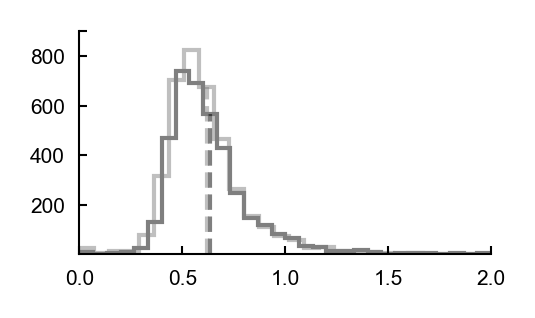

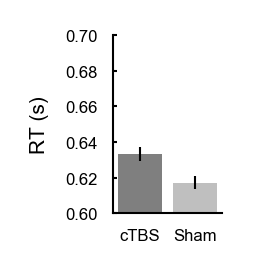

In [31]:
data_unflip = hddm.load_csv('exp2_DDM.csv')

D_R=data_unflip.loc[data_unflip['turn_type'].isin(['Right cTBS','Sham'])]
D_R_C=D_R.loc[D_R['task_type']=='Cons']
D_R_C_Q=D_R_C.loc[D_R_C['snr_type']=='Clear']
D=D_R_C_Q
D_name='D_R_C_Q_'

D_TMS=D.loc[D['turn_type'].isin(['Right cTBS'])]
D_Sham=D.loc[D['turn_type'].isin(['Sham'])]

D_TMS.rt.to_csv(D_name+'TBS_RT.csv')
D_Sham.rt.to_csv(D_name+'Sham_RT.csv')

mean_TMS=D_TMS.rt.mean()
se_TMS=np.std(D_TMS.rt, ddof=1) / np.sqrt(len(D_TMS.rt))
mean_Sham=D_Sham.rt.mean()
se_Sham=np.std(D_Sham.rt, ddof=1) / np.sqrt(len(D_Sham.rt))

plt.rcParams['savefig.dpi']=300
plt.rcParams['font.size']=5
plt.rcParams['axes.linewidth']=0.5
plt.rcParams['font.family']='Arial'

fig, ax = plt.subplots()
fig.set_size_inches(4.5*cm,2.5*cm)

nbins=50
dens_TMS = ax.hist(D_TMS.rt,bins=nbins, histtype='step',density=False,color=[0,0,0],linewidth=1,alpha=0.5)
dens_Sham = ax.hist(D_Sham.rt,bins=nbins, histtype='step',density=False,color=[0.5,0.5,0.5],linewidth=1,alpha=0.5)


for ibin in range(0,nbins-1):
    if dens_TMS[1][ibin] > mean_TMS:
        dens_TMS_mean = dens_TMS[0][ibin-1]
        break

for ibin in range(0,nbins-1):
    if dens_Sham[1][ibin] > mean_Sham:
        dens_Sham_mean = dens_Sham[0][ibin-1]
        break

#ax.set_title('RT distributions')
#ax.set_ylabel('Number of trials')
#ax.set_xlabel('Reaction time (s)')
ax.set_xlim([0,2])
ax.set_xticks(np.linspace(0,2,5))
ax.set_ylim([0,900])
ax.set_yticks([200,400,600,800,900])
ax.set_yticklabels([200,400,600,800])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both',which='major',direction='in',width=0.5,length=2)

ax.axvline(x = mean_TMS, ymin=0,ymax=dens_TMS_mean/900,color =[0,0,0], linestyle ="--",linewidth=1,alpha=0.5)
ax.axvline(x = mean_Sham, ymin=0,ymax=dens_Sham_mean/900,color =[0.5,0.5,0.5], linestyle ="--",linewidth=1,alpha=0.5)
#ax.legend('upper right')

plt.savefig(D_name+'cTBS_RT_dist.pdf',bbox_inches = 'tight',transparent=True)
plt.show()

fig, ax = plt.subplots()

cat = ['cTBS','Sham']
cat_mean = [mean_TMS,mean_Sham]

axbar=ax.bar(cat, cat_mean,yerr=[se_TMS,se_Sham],color=[[0,0,0],[0.5,0.5,0.5]],alpha=0.5)
axbar.errorbar.lines[2][0].set_linewidth(0.5)

ax.set_ylabel('RT (s)',fontsize=5)
#ax.set_title('cTBS: Right stimulation tone noise')
#ax.set_xticks([])
ax.set_ylim([0.6,0.7])
ax.set_yticks(np.linspace(0.6,0.7,6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both',which='major',direction='in',bottom=False,width=0.5,length=1,labelsize=4)
#ax.yaxis.tick_right()

fig.set_size_inches(1.2*cm,2*cm)

plt.savefig(D_name+'cTBS_RT.pdf',bbox_inches = 'tight',transparent=True)
plt.show()

### preparing data

In [4]:
D_R=data.loc[data['turn_type'].isin(['Right cTBS','Sham'])]
D_R_C=D_R.loc[D_R['task_type']=='Cons']
D_R_C_Q=D_R_C.loc[D_R_C['snr_type']=='Clear']
print(D_R_C_Q)
D_R_C_Q.to_csv('Exp2_D_R_C_Q_cTBS.csv')

       subj_idx group_idx   turn_type task_type snr_type  trial_num  step_att  \
2028         55    Larynx  Right cTBS      Cons    Clear          1         3   
2029         55    Larynx  Right cTBS      Cons    Clear          2         4   
2030         55    Larynx  Right cTBS      Cons    Clear          3         4   
2031         55    Larynx  Right cTBS      Cons    Clear          4         5   
2032         55    Larynx  Right cTBS      Cons    Clear          5         4   
2033         55    Larynx  Right cTBS      Cons    Clear          6         4   
2034         55    Larynx  Right cTBS      Cons    Clear          7         5   
2035         55    Larynx  Right cTBS      Cons    Clear          8         5   
2036         55    Larynx  Right cTBS      Cons    Clear          9         1   
2037         55    Larynx  Right cTBS      Cons    Clear         10         3   
2038         55    Larynx  Right cTBS      Cons    Clear         11         5   
2039         55    Larynx  R

In [5]:
def z_link_func_D_R_C_Q(x, data=D_R_C_Q):
    stim = (np.asarray(dmatrix('0 + C(s, [[0], [1]])',
                              {'s': data.turn_type.loc[x.index]},return_type='dataframe'))
    )
    # Apply z = (1 - x) to flip them along 0.5
    z_flip = np.subtract(stim, x.to_frame())
    # The above inverts those values we do not want to flip,
    # so invert them back
    z_flip[stim == 0] *= -1
    return z_flip

### baseline model

In [6]:
a_reg = {'model': "a ~ 1",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_C_Q_bsl = hddm.HDDMRegressor(D_R_C_Q, reg_descr, include='z')
D_R_C_Q_bsl.find_starting_values()
D_R_C_Q_bsl.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_R_C_Q_bsl.save('D_R_C_Q_bsl')

Adding these covariates:
['a_Intercept']
Adding these covariates:
['v_Intercept']
Adding these covariates:
['z_Intercept']


/home/bsliang/miniconda3/envs/bsliang_DDM_27/lib/python2.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2001 of 2000 complete in 2390.5 secWARNING: Will not save custom link functions.


### model 1: a only

In [7]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_C_Q_am = hddm.HDDMRegressor(D_R_C_Q, reg_descr, include='z')
D_R_C_Q_am.find_starting_values()
D_R_C_Q_am.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_R_C_Q_am.save('D_R_C_Q_am')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['v_Intercept']
Adding these covariates:
['z_Intercept']
 [-----------------100%-----------------] 2001 of 2000 complete in 2895.1 secWARNING: Will not save custom link functions.


### model 2: v only

In [8]:
a_reg = {'model': "a ~ 1",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_C_Q_vm = hddm.HDDMRegressor(D_R_C_Q, reg_descr, include='z')
D_R_C_Q_vm.find_starting_values()
D_R_C_Q_vm.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_R_C_Q_vm.save('D_R_C_Q_am')

Adding these covariates:
['a_Intercept']
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['z_Intercept']
 [-----------------100%-----------------] 2001 of 2000 complete in 2958.4 secWARNING: Will not save custom link functions.


### model 3: z only

In [9]:
a_reg = {'model': "a ~ 1",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_C_Q_zm = hddm.HDDMRegressor(D_R_C_Q, reg_descr, include='z')
D_R_C_Q_zm.find_starting_values()
D_R_C_Q_zm.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_R_C_Q_zm.save('D_R_C_Q_zm')

Adding these covariates:
['a_Intercept']
Adding these covariates:
['v_Intercept']
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 2935.4 secWARNING: Will not save custom link functions.


### model 4: a + v

In [10]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_C_Q_avm = hddm.HDDMRegressor(D_R_C_Q, reg_descr, include='z')
D_R_C_Q_avm.find_starting_values()
D_R_C_Q_avm.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_R_C_Q_avm.save('D_R_C_Q_avm')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['z_Intercept']
 [-----------------100%-----------------] 2001 of 2000 complete in 3437.2 secWARNING: Will not save custom link functions.


### model 5: a + z

In [11]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_C_Q_azm = hddm.HDDMRegressor(D_R_C_Q, reg_descr, include='z')
D_R_C_Q_azm.find_starting_values()
D_R_C_Q_azm.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_R_C_Q_azm.save('D_R_C_Q_azm')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['v_Intercept']
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 3419.1 secWARNING: Will not save custom link functions.


### model 6: v + z

In [12]:
a_reg = {'model': "a ~ 1",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_C_Q_vzm = hddm.HDDMRegressor(D_R_C_Q, reg_descr, include='z')
D_R_C_Q_vzm.find_starting_values()
D_R_C_Q_vzm.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_R_C_Q_vzm.save('D_R_C_Q_vzm')

Adding these covariates:
['a_Intercept']
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 3478.5 secWARNING: Will not save custom link functions.


### model 7: a + v + z

In [13]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_C_Q_fm = hddm.HDDMRegressor(D_R_C_Q, reg_descr, include='z')
D_R_C_Q_fm.find_starting_values()
D_R_C_Q_fm.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_R_C_Q_fm.save('D_R_C_Q_fm')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 3964.4 secWARNING: Will not save custom link functions.


### Model comparison

baseline model DIC: 2815.121969
a model DIC: 2810.796432
v model DIC: 2816.504240
z model DIC: 2815.948072
av model DIC: 2812.230691
az model DIC: 2810.602583
vz model DIC: 2820.323790
full model DIC: 2812.094856


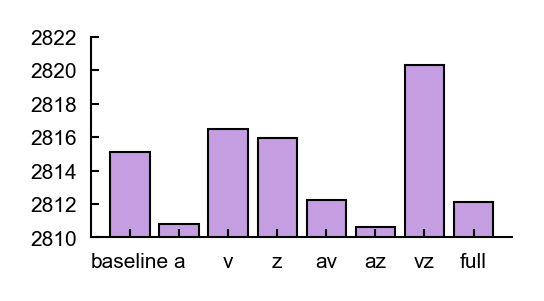

In [30]:
print("baseline model DIC: %f" % D_R_C_Q_bsl.dic)
print("a model DIC: %f" % D_R_C_Q_am.dic)
print("v model DIC: %f" % D_R_C_Q_vm.dic)
print("z model DIC: %f" % D_R_C_Q_zm.dic)
print("av model DIC: %f" % D_R_C_Q_avm.dic)
print("az model DIC: %f" % D_R_C_Q_azm.dic)
print("vz model DIC: %f" % D_R_C_Q_vzm.dic)
print("full model DIC: %f" % D_R_C_Q_fm.dic)

fig, ax = plt.subplots()

fruits = ['baseline', 'a', 'v', 'z', 'av', 'az', 'vz','full']
counts = [D_R_C_Q_bsl.dic, D_R_C_Q_am.dic, D_R_C_Q_vm.dic, D_R_C_Q_zm.dic,D_R_C_Q_avm.dic,D_R_C_Q_azm.dic,D_R_C_Q_vzm.dic,D_R_C_Q_fm.dic]

ax.bar(fruits, counts, color=[197./255,158./255,226./255],edgecolor='black',linewidth=0.5)

ax.set_ylim([2810,2822])
ytick_plot=range(2810,2822,2)
ytick_plot.append(2822)
ax.set_yticks(ytick_plot)
#ax.set_yticklabels(range(5020,5032,2))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.set_size_inches(4.6*cm,2.25*cm)
ax.tick_params('both',which='major',direction='in',width=0.5,length=2)
plt.rcParams['font.size']=5
plt.rcParams['font.family']='Arial'
plt.savefig(D_name+'M_compare.pdf',bbox_inches = 'tight',transparent=True)
plt.show()

### Plotting

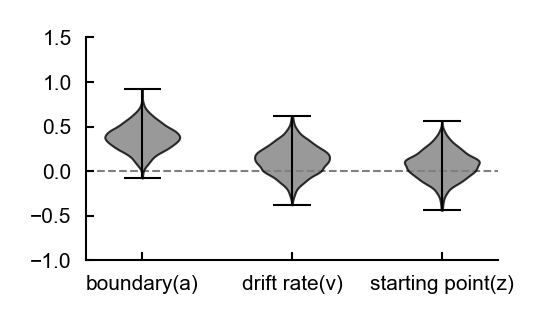

('P(a > Sham) = ', 0.9974747474747475)
('P(v > Sham) = ', 0.7853535353535354)
('P(z > Sham) = ', 0.6737373737373737)


In [26]:
a_Intercept,a_cTBS = D_R_C_Q_fm.nodes_db.loc[["a_Intercept","a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"], 'node']
# hddm.analyze.plot_posterior_nodes([a_Intercept,a_cTBS])
# plt.xlabel('boundary')
# plt.ylabel('Posterior probability')
# plt.title('Full model')

v_Intercept,v_cTBS = D_R_C_Q_fm.nodes_db.loc[["v_Intercept","v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"], 'node']
# hddm.analyze.plot_posterior_nodes([v_Intercept,v_cTBS])
# plt.xlabel('drift-rate')
# plt.ylabel('Posterior probability')
# plt.title('Full model')

z_Intercept,z_cTBS = D_R_C_Q_fm.nodes_db.loc[["z_Intercept","z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"], 'node']
# hddm.analyze.plot_posterior_nodes([z_Intercept,z_cTBS])
# plt.xlabel('starting point')
# plt.ylabel('Posterior probability')
# plt.title('Full model')


fig, ax = plt.subplots()
fig.set_size_inches(4.5*cm,2.5*cm)

para_tag=['boundary(a)','drift rate(v)','starting point(z)']
counts = [a_cTBS.trace()/(max(a_cTBS.trace())-min(a_cTBS.trace())),v_cTBS.trace()/(max(v_cTBS.trace())-min(v_cTBS.trace())),z_cTBS.trace()/(max(z_cTBS.trace())-min(z_cTBS.trace()))]

ax.axhline(y = 0, color =[0.5,0.5,0.5], linestyle ="--", linewidth = 0.5, zorder=0)

vioparts=ax.violinplot(counts)
for pc in vioparts['bodies']:
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_linewidth(0.5)
    pc.set_alpha(0.8)
vioparts['cbars'].set_color('black')
vioparts['cbars'].set_linewidth(0.5)
vioparts['cmaxes'].set_color('black')
vioparts['cmaxes'].set_linewidth(0.5)
vioparts['cmins'].set_color('black')
vioparts['cmins'].set_linewidth(0.5)

ax.set_xticks([1,2,3])
ax.set_xticklabels(para_tag)
#ax.set_title('Full model: Left cTBS consonant quiet')
#ax.set_ylabel('Regression coef (normalized)')
ax.set_ylim([-1,1.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params('both',which='major',direction='in',width=0.5,length=2)
plt.rcParams['savefig.dpi']=300
plt.rcParams['font.size']=5
plt.rcParams['font.family']='Arial'
plt.savefig(D_name+'cTBS_DDMparas.pdf',bbox_inches = 'tight',transparent=True)
plt.show()

print("P(a > Sham) = ", (a_cTBS.trace() > 0).mean())
print("P(v > Sham) = ", (v_cTBS.trace() > 0).mean())
print("P(z > Sham) = ", (z_cTBS.trace() > 0).mean())

### check full model simulation prediction accuracy

#### fit the full model

In [16]:
fm_data_2=D_R_C_Q
fm_data_2.reset_index(inplace = True, drop = True)
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
fm_2 = hddm.HDDMRegressor(fm_data_2, reg_descr, include='z')
fm_2.find_starting_values()
fm_2.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 3976.7 sec

#### plot the full model (compared with the original full model)

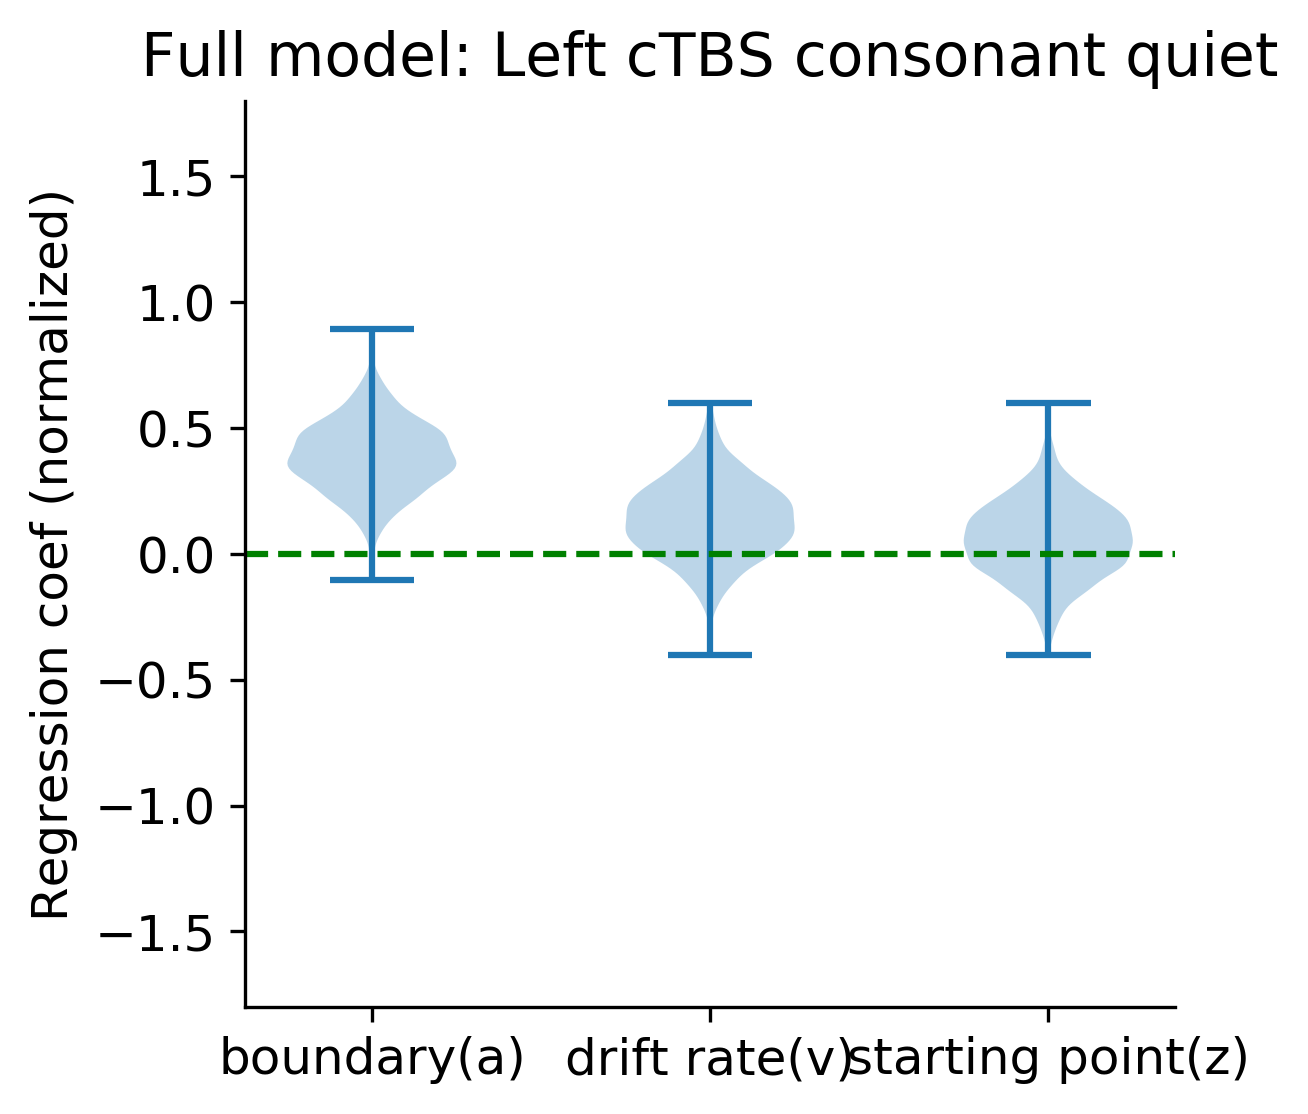

('P(a > Sham) = ', 0.9939393939393939)
('P(v > Sham) = ', 0.8191919191919191)
('P(z > Sham) = ', 0.6348484848484849)


In [17]:
a_Intercept,a_cTBS = fm_2.nodes_db.loc[["a_Intercept","a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"], 'node']
v_Intercept,v_cTBS = fm_2.nodes_db.loc[["v_Intercept","v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"], 'node']
z_Intercept,z_cTBS = fm_2.nodes_db.loc[["z_Intercept","z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"], 'node']

fig, ax = plt.subplots()
fig.set_size_inches(4,4)

para_tag=['boundary(a)','drift rate(v)','starting point(z)']
counts = [a_cTBS.trace()/(max(a_cTBS.trace())-min(a_cTBS.trace())),v_cTBS.trace()/(max(v_cTBS.trace())-min(v_cTBS.trace())),z_cTBS.trace()/(max(z_cTBS.trace())-min(z_cTBS.trace()))]

ax.axhline(y = 0, color ="green", linestyle ="--")
ax.violinplot(counts)
ax.set_xticks([1,2,3])
ax.set_xticklabels(para_tag)
ax.set_title('Full model: Left cTBS consonant quiet')
ax.set_ylabel('Regression coef (normalized)')
ax.set_ylim([-1.8,1.8])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

print("P(a > Sham) = ", (a_cTBS.trace() > 0).mean())
print("P(v > Sham) = ", (v_cTBS.trace() > 0).mean())
print("P(z > Sham) = ", (z_cTBS.trace() > 0).mean())

#### predict data from simulated data derived from full model

In [18]:
fm_data_2_sim = hddm.utils.post_pred_gen(fm_2)
hddm.utils.post_pred_stats(fm_data_2, fm_data_2_sim)

 [-------------------112%-------------------] 28 of 25 complete in 23107.5 sec

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.643718,0.650133,0.085659,0.000041,0.007379,True,47.624001,0.074891
mean_ub,0.606475,0.632895,0.105669,0.000698,0.011864,True,48.000000,0.250027
std_ub,0.224327,0.208704,0.065149,0.000244,0.004488,True,63.223999,0.239793
10q_ub,0.417056,0.447043,0.079414,0.000899,0.007206,True,30.856001,0.377611
30q_ub,0.493031,0.500836,0.085696,0.000061,0.007405,True,49.976002,0.091075
50q_ub,0.558337,0.569059,0.096479,0.000115,0.009423,True,52.616001,0.111130
70q_ub,0.648363,0.674060,0.116582,0.000660,0.014252,True,49.472000,0.220422
90q_ub,0.848408,0.902161,0.172757,0.002889,0.032734,True,45.520000,0.311148
mean_lb,-0.659362,-0.655930,0.100758,0.000012,0.010164,True,44.200001,0.034062
